In [172]:
import numpy as np
import pandas as pd

In [173]:
df0 = pd.read_json("https://api.covid19india.org/v3/timeseries.json")

In [174]:

TN = df0['TN']
TN =TN.to_dict() 
data = pd.DataFrame.from_dict(TN)
data =  data.transpose()
data = data['total']
df2=pd.DataFrame(data)
data=data.reindex(index=data.index[::-1])
data = data.drop(data.index[0:28])
data = data.head(len(data)-3)


In [180]:

TN = df0['TN']
TN =TN.to_dict() 
d = pd.DataFrame.from_dict(TN)
d =  d.transpose()
d = d['delta']
df2=pd.DataFrame(d)
d=d.reindex(index=d.index[::-1])
d = d.drop(d.index[0:28])
d = d.head(len(d)-11)


In [181]:
dcon = []
con = []
dec = []
rec = []

for index, value in data.items():
    con.append(data[index]['confirmed'])
    dec.append(data[index]['deceased'])
    rec.append(data[index]['recovered'])
    

for index, value in d.items():
    dcon.append(d[index]['confirmed'])
  
n = len(data)
day = list(range(1, n+1))

dict1 = { 
'date' : data.index.values,
'Total Confirmed' :con,
'Total Deceased' : dec,
'Total Recovered' : rec,
}

nn = len(d)
day1 = list(range(1, nn+1))
dict2 = { 
         'Date' : d.index.values,
         'Daily Confirmed' :dcon,
         
    
}

dict1
DF= pd.DataFrame(dict1) 
DF=DF.head(len(DF))
DF=DF.reindex(index=DF.index[::-1])
DF["Day"] = day
Dailyf = pd.DataFrame(dict2) 
Dailyf=Dailyf.reindex(index=Dailyf.index[::-1])
Dailyf["Day"] = day1
df=Dailyf
#data['2020-06-13']['confirmed']

In [182]:
xlen=len(df)
sp=round(xlen*0.8)
df['Date'] = pd.to_datetime(df['Date'])


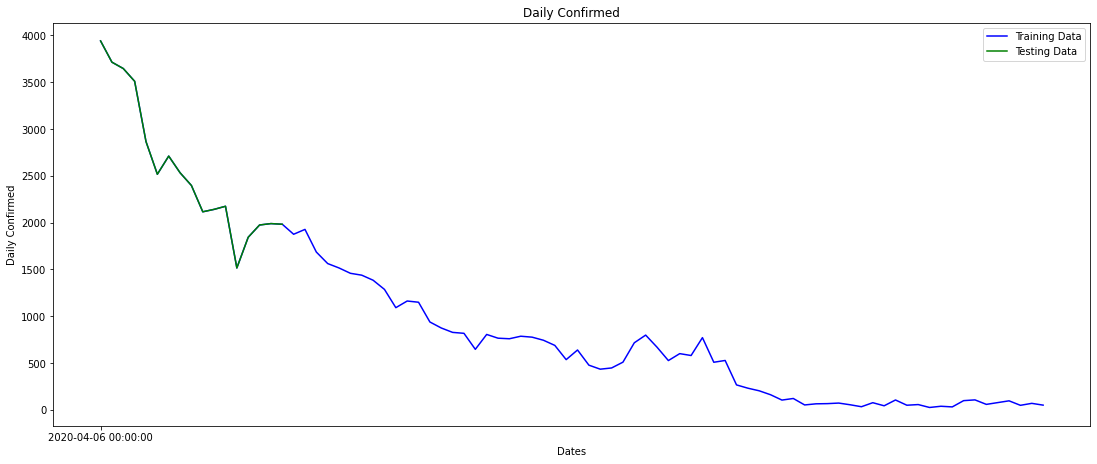

In [183]:
import matplotlib.pyplot as plt
train_data, test_data = df[0:sp], df[sp:]
fig= plt.figure(figsize=(18,7))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
#plt.figure(figsize=(12,7))
plt.title('Daily Confirmed')
plt.xlabel('Dates')
plt.ylabel('Daily Confirmed')
plt.plot(df['Daily Confirmed'], 'blue', label='Training Data')
plt.plot(test_data['Daily Confirmed'], 'green', label='Testing Data')
plt.xticks(np.arange(0,sp,xlen), df['Date'][0:sp:xlen])
plt.legend()

In [184]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))

In [185]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
train_ar = train_data['Daily Confirmed'].values
test_ar = test_data['Daily Confirmed'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    my_order = (1, 1, 1)
    my_seasonal_order = (1, 1, 1, 12)
    model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order)
    #model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)



<class 'list'>


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing Mean Squared Error: 85178.257
Symmetric mean absolute percentage error: 8.988


In [186]:
f=[]
def forecast(x) :
  f = model_fit.forecast(steps=x)
  f = np.round(f)
  return f

In [187]:
forecast(5)

array([3635., 3916., 3923., 3906., 4073.])

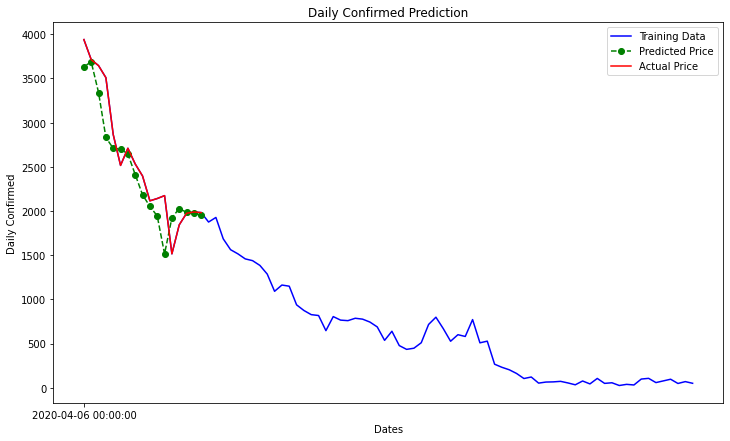

In [188]:
plt.figure(figsize=(12,7))
plt.plot(df['Daily Confirmed'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Daily Confirmed'], color='red', label='Actual Price')
plt.title('Daily Confirmed Prediction')
plt.xlabel('Dates')
plt.ylabel('Daily Confirmed')
plt.xticks(np.arange(0,sp,xlen), df['Date'][0:sp:xlen])
plt.legend()

In [189]:
df2 = Dailyf.tail(17)
df1 =DF.tail(6)

In [190]:
X1 = np.array(df1['Day'])
X2 = np.array(df2['Day'])
#Y1 = np.array(df1['Total Confirmed'])
#Y2 = np.array(df1['Total Recovered'])
#Y3 = np.array(df1['Total Deceased'])
Y1 = np.log(df1['Total Confirmed'])
Y1 = np.array(Y1)
Y2 = np.log(df1['Total Recovered'])
Y2 = np.array(Y2)
Y3 = np.log(df1['Total Deceased'])
Y3 = np.array(Y3)
#Y4 = np.array(df2['Daily Confirmed'])

Y4 =np.log(df2['Daily Confirmed'])
Y4 = np.array(Y4)


In [191]:
from sklearn.linear_model import LinearRegression
X1=X1.reshape(-1, 1)
X2=X2.reshape(-1, 1)
Y1=Y1.reshape(-1, 1)
Y2=Y2.reshape(-1, 1)
Y3=Y3.reshape(-1, 1)
Y4=Y4.reshape(-1, 1)

reg1 = LinearRegression().fit(X1, Y1)
reg2 = LinearRegression().fit(X1, Y2)
reg3 = LinearRegression().fit(X1, Y3)
reg4 = LinearRegression().fit(X2, Y4)


logb1 = reg1.coef_
loga1 = reg1.intercept_
a1 = np.exp(loga1)
b1 = np.exp(logb1)

logb2 = reg2.coef_
loga2 = reg2.intercept_
a2 = np.exp(loga2)
b2 = np.exp(logb2)

logb3 = reg3.coef_
loga3 = reg3.intercept_
a3 = np.exp(loga3)
b3 = np.exp(logb3)

logb4 = reg4.coef_
loga4 = reg4.intercept_
a4 = np.exp(loga4)
b4 = np.exp(logb4)



#print("Based on Last 20 Days Data")
#print ("Total Confirmed Accuracy", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Confirmed", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Recovered ", reg2.score(X1, Y2)*100)
print ("coefficient of determination for Total Deceased ", reg3.score(X1, Y3)*100)
print("coefficient of determination for Based on Last 30 Days Data")
print ("coefficient of determination for Daily Confirmed ", reg4.score(X2, Y4)*100)
#print ("coefficient of determination for Daily Recovered ", reg5.score(X2, Y5)*100)
#print ("coefficient of determination for Daily Deceased ", reg6.score(X2, Y6)*100)


coefficient of determination for Total Confirmed 99.96214343193434
coefficient of determination for Total Recovered  98.93138206719236
coefficient of determination for Total Deceased  99.37641443431289
coefficient of determination for Based on Last 30 Days Data
coefficient of determination for Daily Confirmed  83.46689620101725


In [204]:
drange = 30
start =len(df) +1
dval = np.arange(start,start+drange,1)
dval= np.array(dval)
val= dval
dval=dval.reshape(-1, 1)

start1 =len(DF)
dval1 = np.arange(start1,start1+drange,1)
dval1= np.array(dval1)
val1= dval1
dval1=dval1.reshape(-1, 1)
import datetime
base = datetime.date.today() - datetime.timedelta(days=1)
date_list = [base + datetime.timedelta(days=x) for x in range(drange)]

DConfirmed = forecast(drange+1)
DConfirmed =DConfirmed[1:]
#DConfirmed = np.round_(np.multiply(a4,(np.power(b4,val))))
TConfirmed = np.round_(np.multiply(a1,(np.power(b1,val1))))
#TConfirmed = np.round_(reg1.predict(dval1))
#DRecovered = np.round_(np.multiply(a5,(np.power(b5,val))))
#TRecovered = np.round_(np.multiply(a2,(np.power(b2,val1))))
#TRecovered = np.round_(reg2.predict(dval1))
#DDeceased = np.round_(np.multiply(a6,(np.power(b6,val))))
#TDeceased = np.round_(np.multiply(a3,(np.power(b3,val1))))
#TDeceased = np.round_(reg3.predict(dval1))

dict = {
        'Date' : date_list,
        'Daily Confirmed': DConfirmed.flatten(), 
        'Total Confirmed': TConfirmed.flatten(), 
   #     'Daily Recovered': DRecovered.flatten() ,
    #    'Total Recovered': TRecovered.flatten(),
    #    'Daily Deceased' : DDeceased.flatten(),
     #   'Total Deceased' : TDeceased.flatten(),
        'Day' : dval1.flatten() ,
       } 
final = pd.DataFrame(dict) 
start1

92

In [205]:
final.head(20)

,Date,Daily Confirmed,Total Confirmed,Day
0,2020-06-28,3916.0,82234.0,92
1,2020-06-29,3923.0,86344.0,93
2,2020-06-30,3906.0,90660.0,94
3,2020-07-01,4073.0,95192.0,95
4,2020-07-02,4176.0,99950.0,96
5,2020-07-03,4376.0,104946.0,97
6,2020-07-04,4269.0,110191.0,98
7,2020-07-05,4496.0,115699.0,99
8,2020-07-06,4759.0,121482.0,100
9,2020-07-07,4809.0,127554.0,101


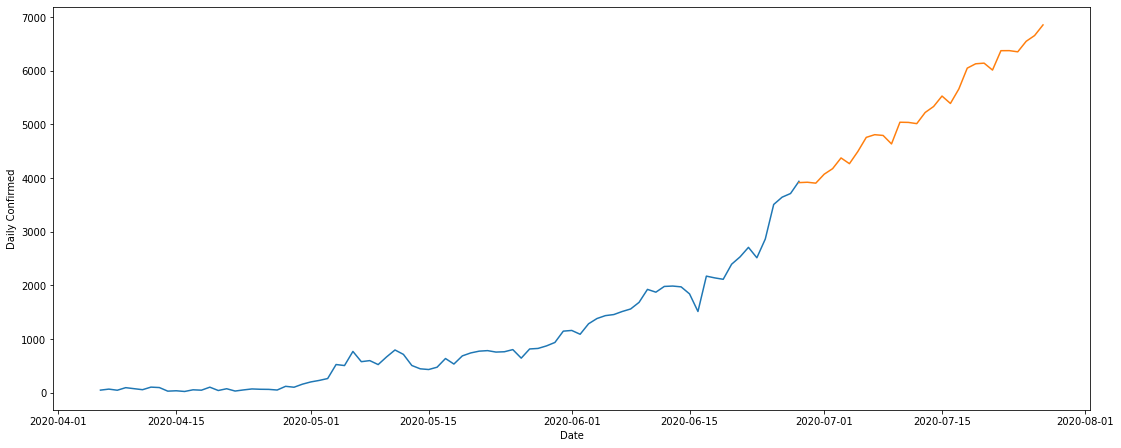

In [206]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df['Date']
position =df['Daily Confirmed']

time1 = final['Date']
position1 = final['Daily Confirmed']

axes.plot(time, position)
axes.plot(time1, position1)
plt.xlabel('Date')
plt.ylabel('Daily Confirmed')

plt.show()
fig.savefig('TN_Daily.png')


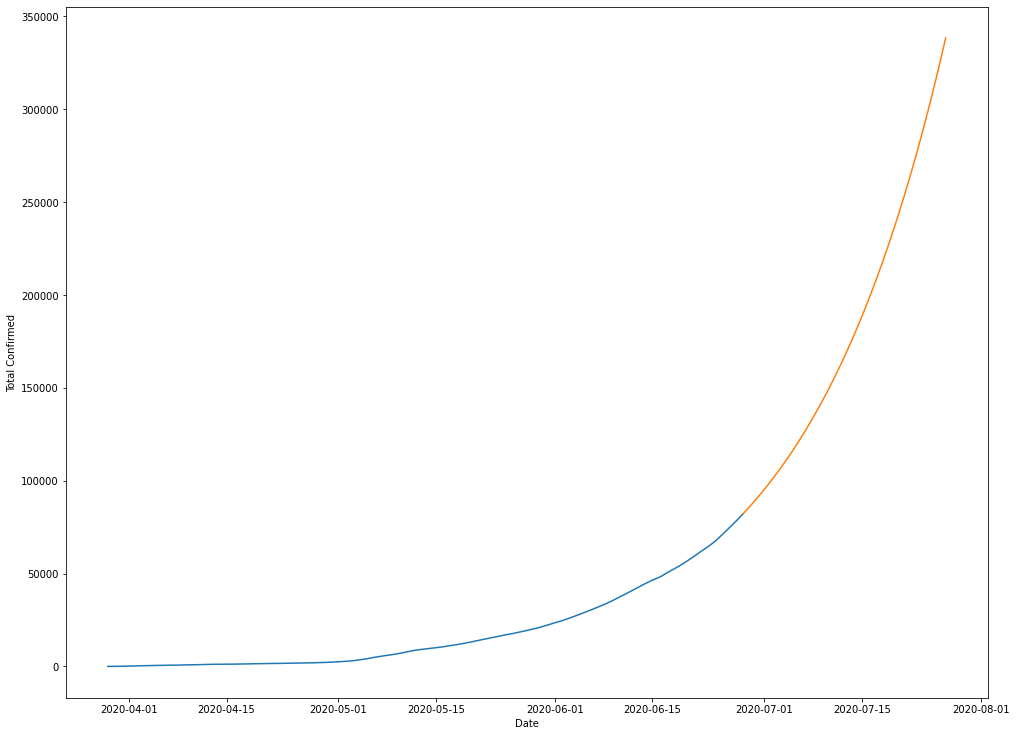

In [207]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(16,12))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = DF['date']
position =DF['Total Confirmed']

time1 = final['Date']
position1 = final['Total Confirmed']
axes.plot(time, position)
axes.plot(time1, position1)

plt.xlabel('Date')
plt.ylabel('Total Confirmed')
fig.savefig('TN_Total.png')

In [208]:
#save to Csv
final.to_csv("predictTN.csv")
pr=pd.read_csv('predictTN.csv')
pr.head()

,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Day
0,0,2020-06-28,3916.0,82234.0,92
1,1,2020-06-29,3923.0,86344.0,93
2,2,2020-06-30,3906.0,90660.0,94
3,3,2020-07-01,4073.0,95192.0,95
4,4,2020-07-02,4176.0,99950.0,96


In [212]:
p=pd.read_csv('mypredtn.csv')
p

,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Day
0,0,2020-06-19,2158.0,54401.0,83
1,1,2020-06-20,2236.0,56623.0,84
2,2,2020-06-21,2316.0,58936.0,85
3,3,2020-06-22,2400.0,61343.0,86
4,4,2020-06-23,2486.0,63849.0,87
5,5,2020-06-24,2575.0,66457.0,88
6,6,2020-06-25,2668.0,69171.0,89
7,7,2020-06-26,2764.0,71997.0,90
8,8,2020-06-27,2863.0,74937.0,91
9,9,2020-06-28,2966.0,77998.0,92


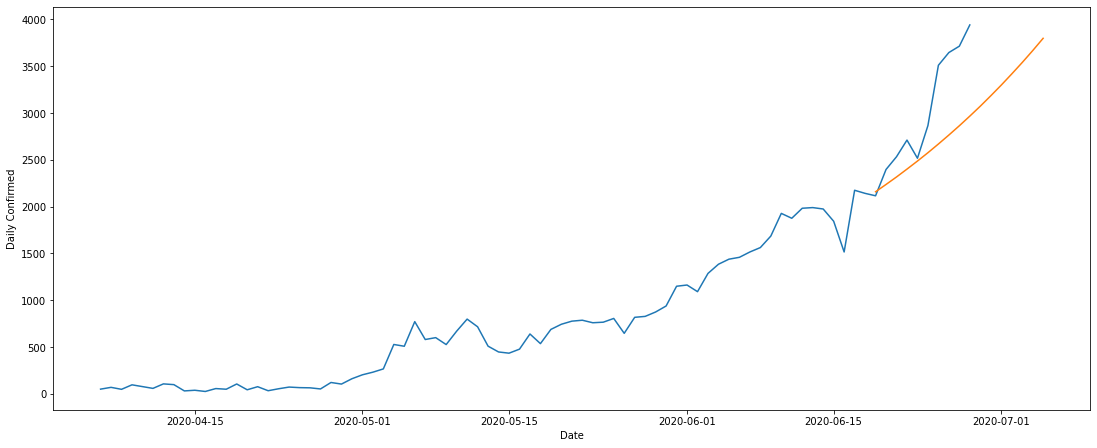

In [216]:
%matplotlib inline
import matplotlib.pyplot as plt
p['Date'] = pd.to_datetime(p['Date'])
fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df['Date']
position =df['Daily Confirmed']

time1 = p['Date']
position1 = p['Daily Confirmed']

axes.plot(time, position)
axes.plot(time1, position1)
plt.xlabel('Date')
plt.ylabel('Daily Confirmed')

plt.show()
fig.savefig('Pred_Vs_Actualpng')




In [214]:
DF.head()

,date,Total Confirmed,Total Deceased,Total Recovered,Day
91,2020-03-29,50,1,4,1
90,2020-03-30,67,1,4,2
89,2020-03-31,124,1,6,3
88,2020-04-01,234,1,6,4
87,2020-04-02,309,1,6,5


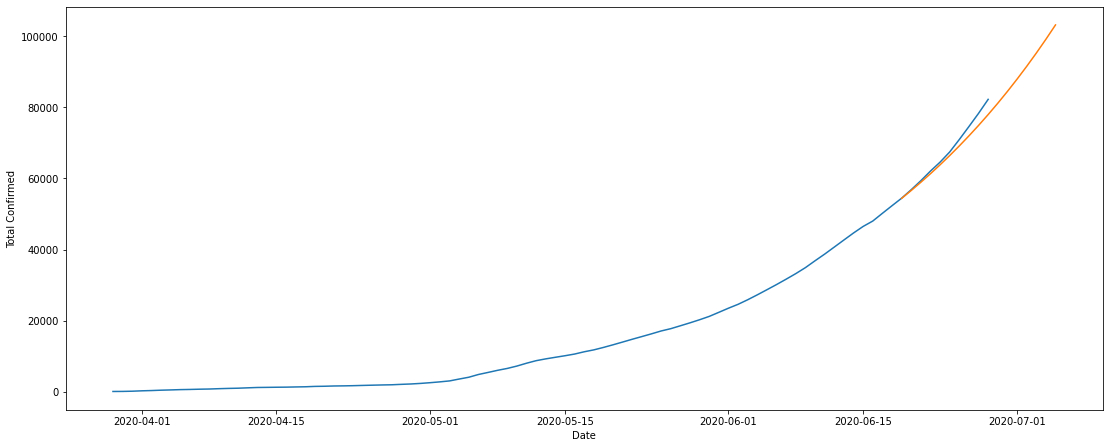

In [215]:
%matplotlib inline
import matplotlib.pyplot as plt
p['Date'] = pd.to_datetime(p['Date'])
fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = DF['date']
position =DF['Total Confirmed']

time1 = p['Date']
position1 = p['Total Confirmed']

axes.plot(time, position)
axes.plot(time1, position1)
plt.xlabel('Date')
plt.ylabel('Total Confirmed')

plt.show()
fig.savefig('Pred_Vs_Actual_Total.png')